In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
ds=pd.read_csv('/content/winequality-red.csv')

In [3]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
ds.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


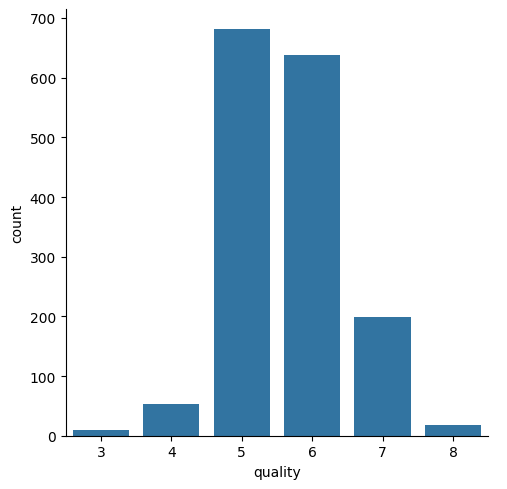

In [5]:
sns.catplot(x='quality',data=ds,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

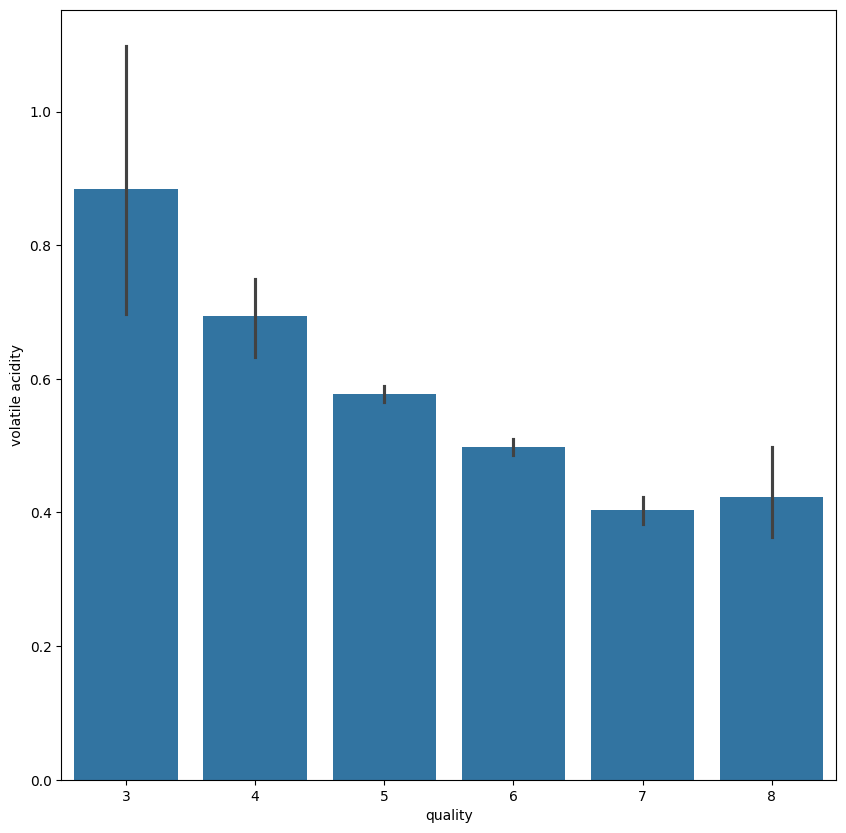

In [7]:
plot=plt.figure(figsize=(10,10))
sns.barplot(x='quality',y='volatile acidity',data=ds)

<Axes: xlabel='quality', ylabel='citric acid'>

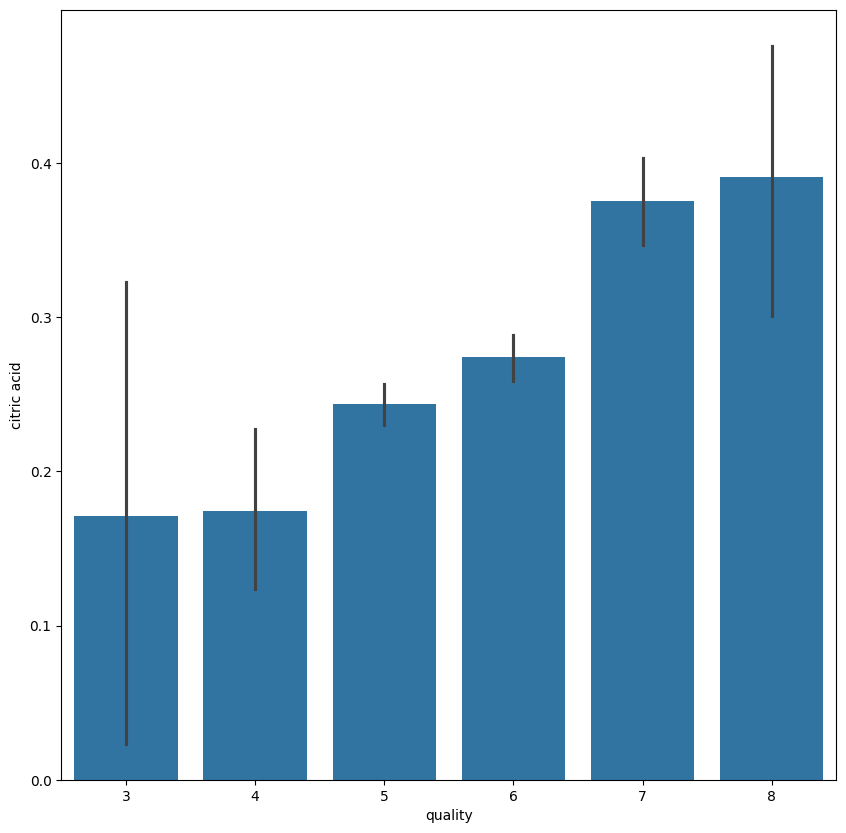

In [8]:
plot=plt.figure(figsize=(10,10))
sns.barplot(x='quality',y='citric acid',data=ds)

In [9]:
correlation=ds.corr()

<Axes: >

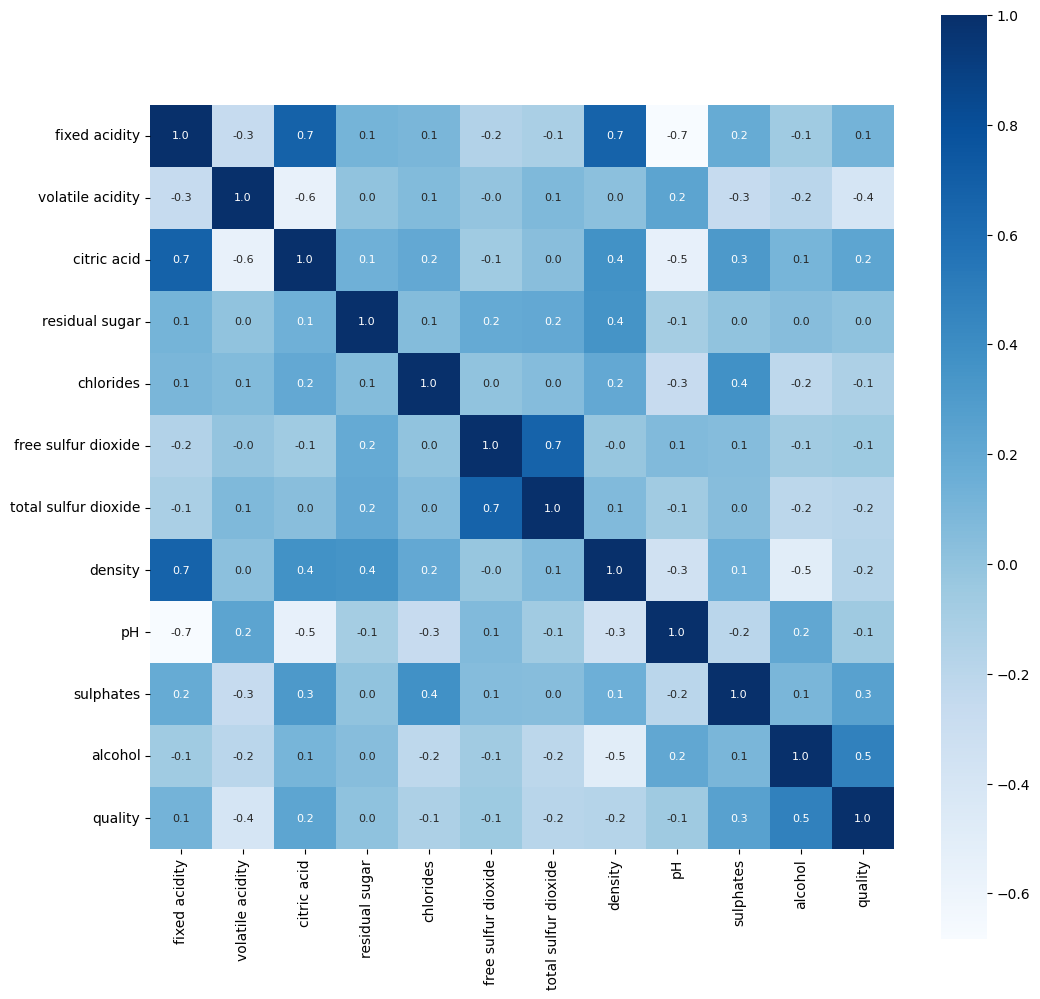

In [14]:
plot=plt.figure(figsize=(12,12))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues',fmt='.1f')

In [16]:
x=ds.drop(columns='quality',axis=1)
y=ds.quality.apply(lambda y_value:1 if y_value>=7 else 0)
print(x)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [18]:
model = RandomForestClassifier()

In [19]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
x_test_prediction=model.predict(x_test)
print(accuracy_score(y_test,x_test_prediction))

0.928125


In [23]:
data=(7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)
input=np.asarray(data)
input=input.reshape((1,-1))
prediction=model.predict(input)
print(prediction)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
